In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv") #relative path
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


* Bar Charts 
* load dataset
* create bar plots to compare average total streams (millions) across different genres:

1. Use groupby() and .mean() to prepare data
2. Create vertical bar charts with plt.bar()
3. Label axes, add titles, and rotate x-axis labels
4. Customize bar colors and widths
Bar plots are perfect for comparing quantities across groups like: genres, artists, or platform types. In this case, we’ll use them to compare things like average total streams or skip rates across different genres.

Barchart- measuring some value on categorical data, X-axis will have the categorical data variable; eg- country,artist,album, genre. Y-axis will some kind ofmeasurment, account, avg,etc

In [8]:
#group by genre and calculate the avg total streams
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending = False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

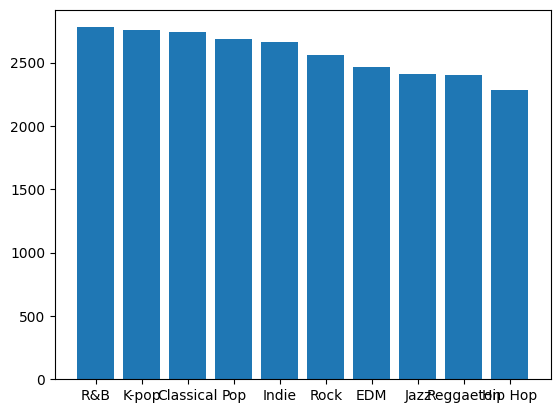

In [10]:
# simple bar chart
plt.bar(avg_streams.index, avg_streams.values)
plt.show()

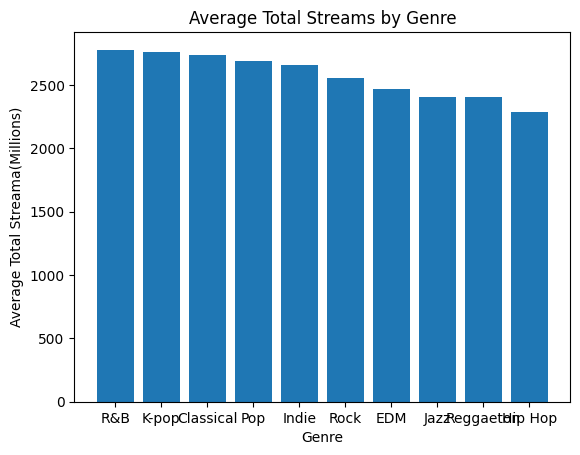

In [12]:
# add axes and labels to bar chart
plt.bar(avg_streams.index, avg_streams.values)
plt.xlabel("Genre")
plt.ylabel("Average Total Streama(Millions)")
plt.title("Average Total Streams by Genre")
plt.show()

In [ ]:
# bar chart size, 
plt.figure(figsize=(10,6)) #10, 6
plt.bar(avg_streams.index, avg_streams.values)
plt.xlabel("Genre")
plt.ylabel("Average Total Streama(Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45,ha = "right") #x labels 
plt.tight.layout() #everything is evenly spaced, overall adjust
plt.show()

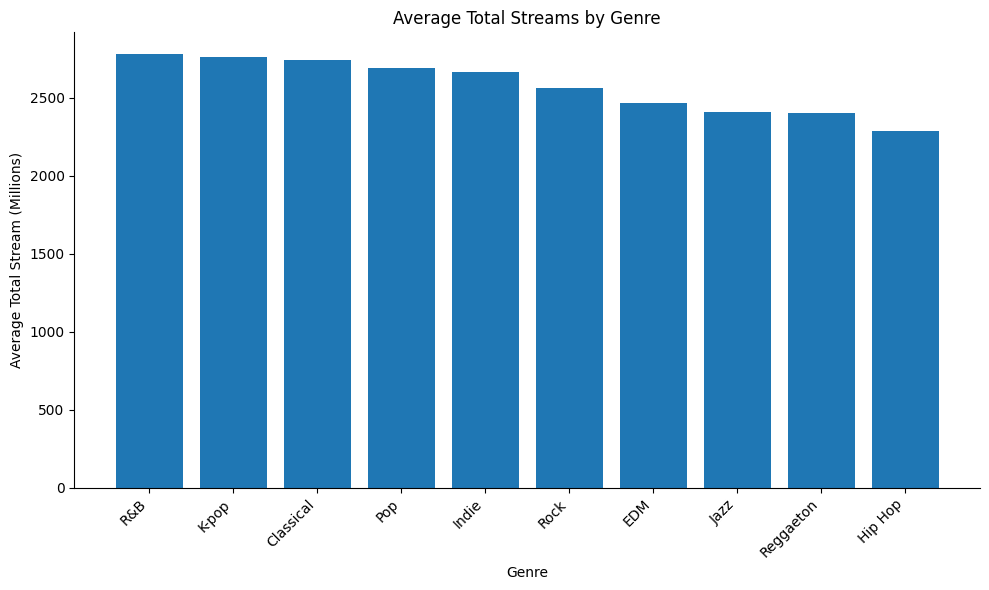

In [ ]:
# bar chart spines, #spine object color, position, size, visibility
plt.figure(figsize=(10,6)) #10, 6
plt.bar(avg_streams.index, avg_streams.values)

ax= plt.gca()  #gca() --get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Average Total Stream (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45,ha = "right") #x labels 
plt.tight_layout() #everything is evenly spaced, overall adjust
plt.show()

In [22]:
#spine object color, position, size, visibility
avg_artist_streams= spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

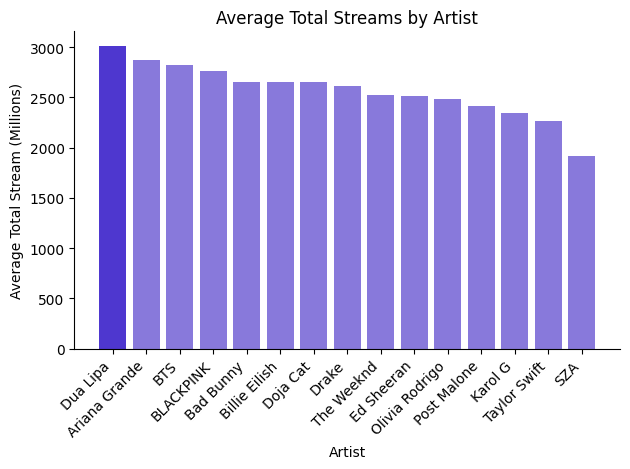

In [26]:
plt.Figure(figsize=(10,6))
colors=["#8879db"]*len(avg_artist_streams) # list of colors, list of color for how many bars we have

max_index = avg_artist_streams.idxmax() #index of max value
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#4e37cf"

plt.bar(avg_artist_streams.index,avg_artist_streams.values,color = colors, width = 0.8)

ax= plt.gca()  #gca() --get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Stream (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45,ha = "right") #x labels 
plt.tight_layout() #everything is evenly spaced, overall adjust
plt.show()

#color brewer https://colorbrewer2.org/#type=sequential&scheme=Purples&n=3

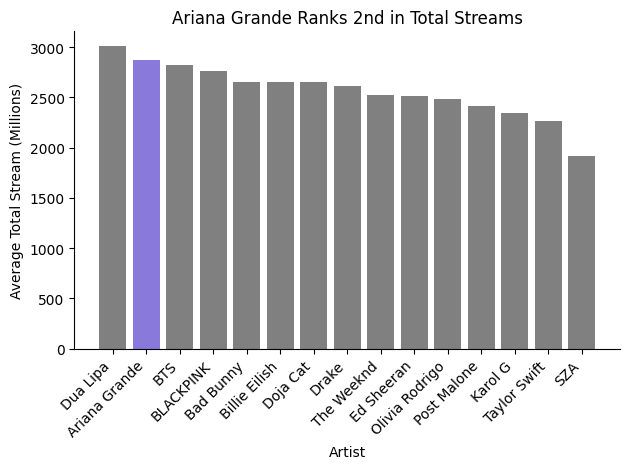

In [ ]:
# Special artist
plt.Figure(figsize=(10,6))

special_artist = "Ariana Grande"
colors = ["#8879db" if artist == special_artist else "gray" for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index,avg_artist_streams.values,color = colors, width = 0.8)

ax= plt.gca()  #gca() --get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Artist")
plt.ylabel("Average Total Stream (Millions)")
plt.title("Ariana Grande Ranks 2nd in Total Streams")
plt.xticks(rotation=45,ha = "right") #x labels 
plt.tight_layout() #everything is evenly spaced, overall adjust
plt.show()

* Scatter Plots
We’ll use Matplotlib to create scatter plots to visualize the relationship between two numeric variables.

In the video, we’ll walk through how to:

Choose two numeric columns from the dataset
Use plt.scatter() to create a basic scatter plot
Label axes and add a title
Adjust point size, color, and transparency for better readability
Scatter plots are great for exploring trends, clusters, and possible correlations between two continuous variables. They’re especially useful when you're looking for patterns that might help explain or predict something.

In [4]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

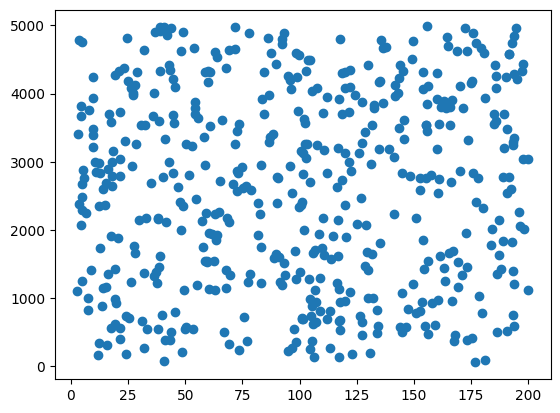

In [7]:
plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], spotify_df["Total Streams (Millions)"])
plt.show()

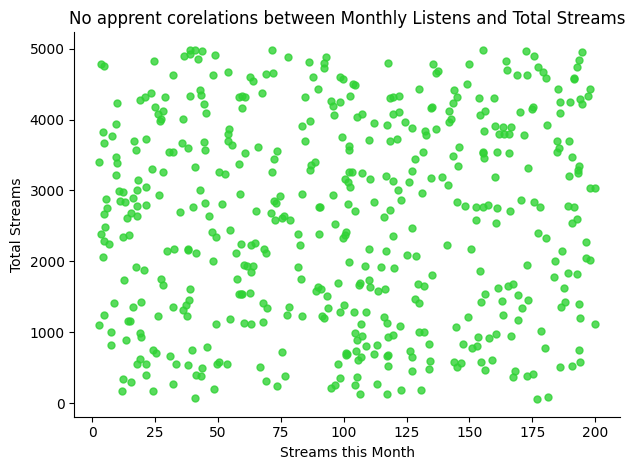

In [ ]:
plt.Figure(figsize=(10,6))
plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = "#30d235",  #color of dots
    alpha = 0.8,     #transparency
    s= 25)          #dot size

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No apprent corelations between Monthly Listens and Total Streams")

ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

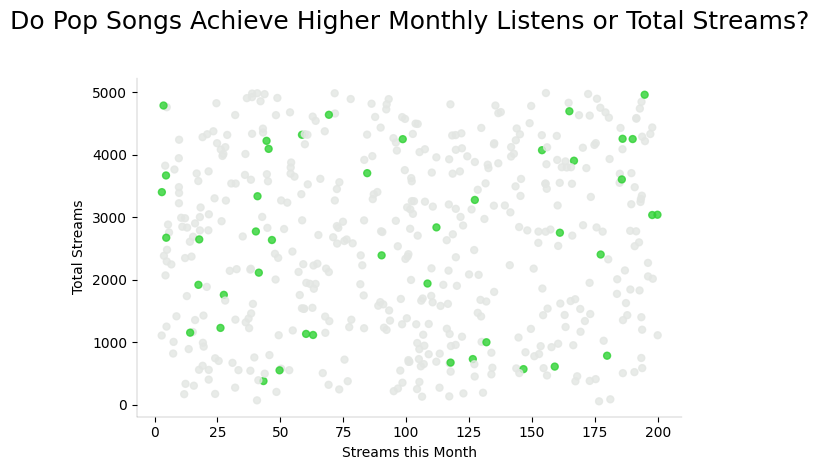

In [20]:
#highlight certain dots
plt.Figure(figsize=(10,6))

featured_genre = "Pop"
colors = ["#30d235" if genre == featured_genre else "#e3e6e3" for genre in spotify_df["Genre"]]

plt.scatter(
    spotify_df["Streams Last 30 Days (Millions)"], 
    spotify_df["Total Streams (Millions)"],
    color = colors,  #color of dots
    alpha = 0.8,     #transparency
    s= 25)          #dot size

plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
#plt.title("No apprent corelations between Monthly Listens and Total Streams")

ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(
    "Do Pop Songs Achieve Higher Monthly Listens or Total Streams?",
    fontsize =18,
    pad = 35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)


plt.tight_layout()
plt.show()

* Line Charts
Now let’s create line charts that show how a variable changes over time.

In the video, we’ll walk through how to:

Use the Release Year column as a time-based x-axis
Group and summarize data by year (e.g. average streams or skip rates)
Use plt.plot() to draw a line showing change over time
Label axes and add a title
Customize line style, markers, and axis ticks for better clarity
Line charts are ideal for showing (change over time)trends and patterns across time. Whether you're tracking average popularity or total streams per year, these charts help highlight rises, drops, and long-term changes at a glance.

In [23]:
yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg


Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

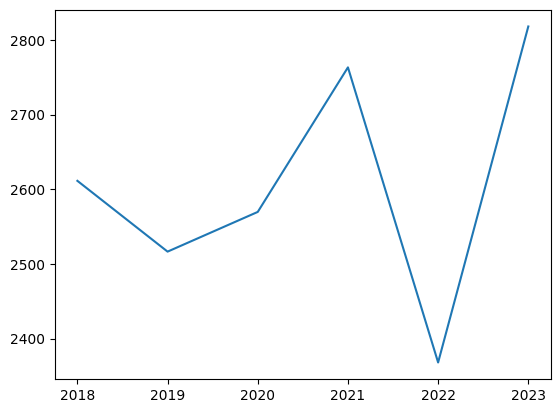

In [24]:
plt.Figure(figsize=(10,6))

plt.plot(yearly_avg.index, yearly_avg.values)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

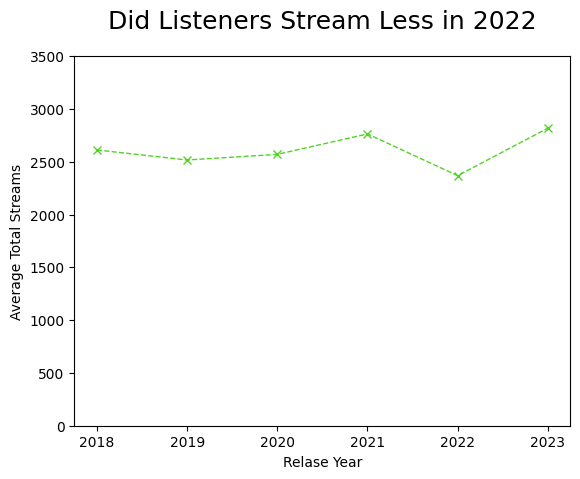

In [ ]:
#change from zoomed in to less zoomed
plt.Figure(figsize=(10,6))

plt.plot(yearly_avg.index, 
         yearly_avg.values,
         marker="x",
         linestyle = "--",
         color = "#52d327",
         linewidth = 1)

plt.xlabel("Relase Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2022?",
          fontsize=18,
          pad = 20)

plt.ylim(0,3500)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

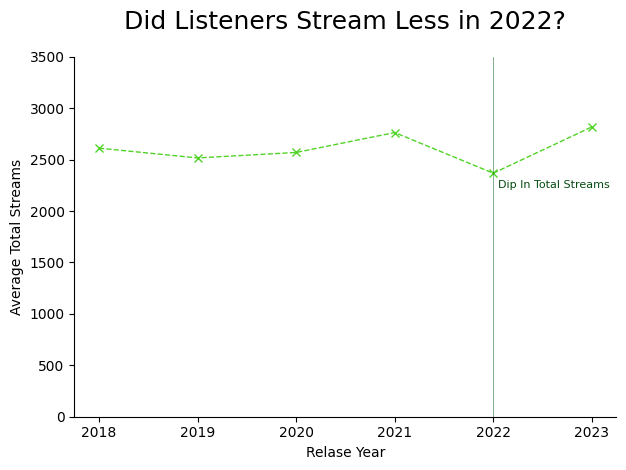

In [42]:
#add verticle line for 2022
plt.Figure(figsize=(12,6))

plt.plot(yearly_avg.index, 
         yearly_avg.values,
         marker="x",
         linestyle = "--",
         color = "#52d327",
         linewidth = 1)

plt.xlabel("Relase Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2022?",
          fontsize=18,
          pad = 20)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.axvline(
    2022,
    color = "#09601e",
    linewidth = 0.5,
    alpha =0.7,)

ax.text (
    2022+0.05,
    2225,
    "Dip In Total Streams",
    color = "#054b11",
    fontsize = 8
)

plt.ylim(0,3500)

plt.tight_layout()
plt.show

* Pie Charts
Next, we’ll create pie charts using Matplotlib to show proportions across categories.

In the video, we’ll walk through how to:

Choose a categorical column (like platform type or genre)
Use .value_counts() or .groupby().sum() to calculate totals
Use plt.pie() to create a simple pie chart
Add labels and percentages with autopct
Customize colors and layout for better readability
Pie charts are useful when you want to show how different parts contribute to a whole- for example, the proportion of Free vs Premium streams. Just keep in mind that pie charts can get hard to read when there are too many categories or similar-sized slices. In many cases, a bar chart is a clearer alternative.

In [44]:
#total streams, break by platform type
category = "Platform Type"
values = "Total Streams (Millions)"

platform_totals = spotify_df.groupby(category)[values].sum() #sum of the values by category
platform_totals

Platform Type
Free       638685.97
Premium    651891.07
Name: Total Streams (Millions), dtype: float64

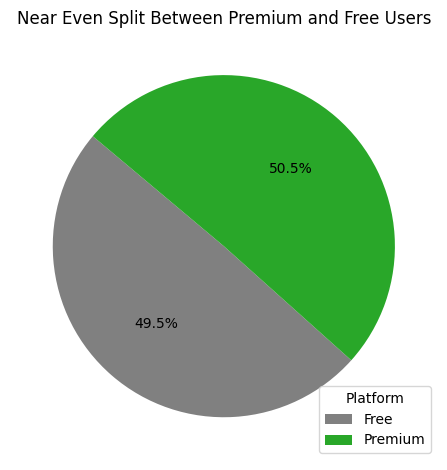

In [58]:
plt.Figure(figsize=(9,9))
plt.pie(
    platform_totals,
    #labels = platform_totals.index,
    labels = None,
    startangle=140,
    colors=["gray","#29a729"],
    autopct="%1.1f%%"
)

plt.title("Near Even Split Between Premium and Free Users")

plt.legend(
    labels =platform_totals.index,
    loc ="lower right",
    title = "Platform"
)

plt.tight_layout()
plt.show()

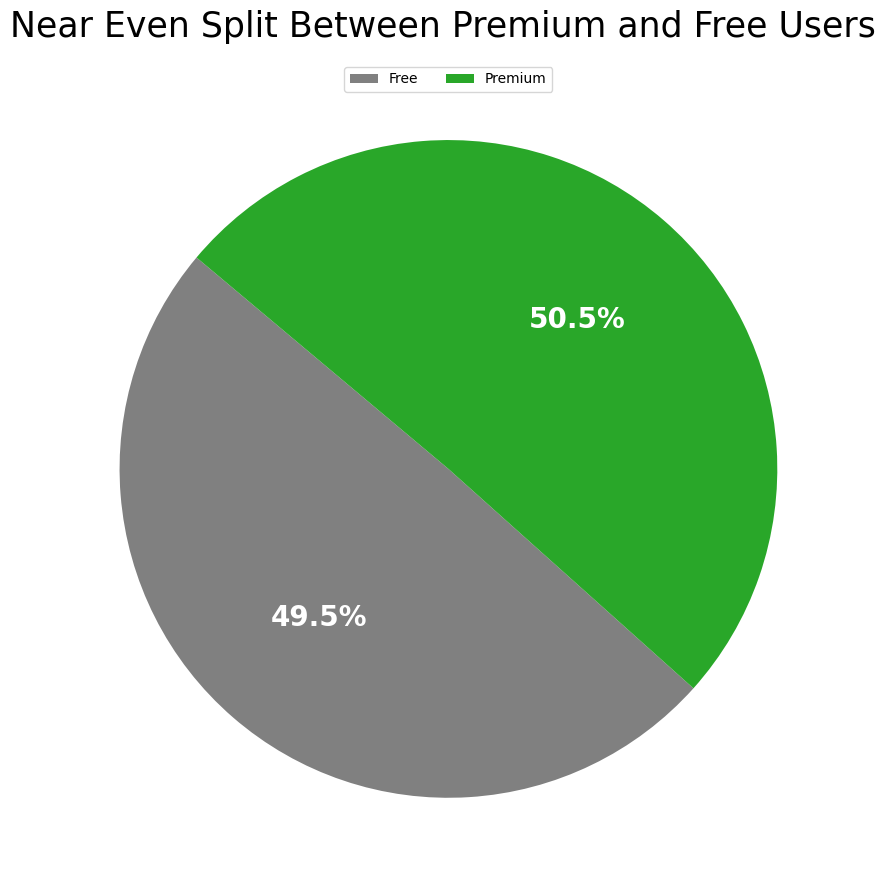

In [155]:
# 
fig,ax = plt.subplots(figsize = (9,9))


#plt.Figure(figsize=(8,8))
wedges, texts,autotexts = ax.pie(
    platform_totals,
    autopct="%1.1f%%",
    #labels = platform_totals.index,
    labels = None,
    startangle=140,
    colors=["gray","#29a729"],
    
)

#plt.title("Near Even Split Between Premium and Free Users")

ax.set_title(
    "Near Even Split Between Premium and Free Users ",
    fontsize = 25,
    pad = 15,
    loc = "center"
)

for autotext in autotexts:
    autotext.set_fontsize(20)
    autotext.set_color("white")
    autotext.set_weight("bold")

# plt.legend(
#     labels =platform_totals.index,
#     loc ="lower right",
#     title = "Platform"
# )

ax.legend(
    wedges,
    platform_totals.index,
    loc="lower center",
    bbox_to_anchor = (0.5,0.95),
    ncol= 2
)

plt.tight_layout()
plt.show()

* Histograms
Now we’ll use Matplotlib to create histograms, which show the distribution of a single numeric variable.

In the video, we’ll walk through how to:

Select a numeric column (like stream duration or skip rate)
Use plt.hist() to create a histogram
Adjust the number of bins to reveal patterns
Add axis labels and a title
Customize colors, transparency, and edge outlines
Histograms are great for understanding the shape and spread of your data. They can help you spot things like skewed distributions, common value ranges, or outliers. For example, you might use a histogram to explore how most songs cluster around a certain stream duration, or how skip rates vary across the catalog.

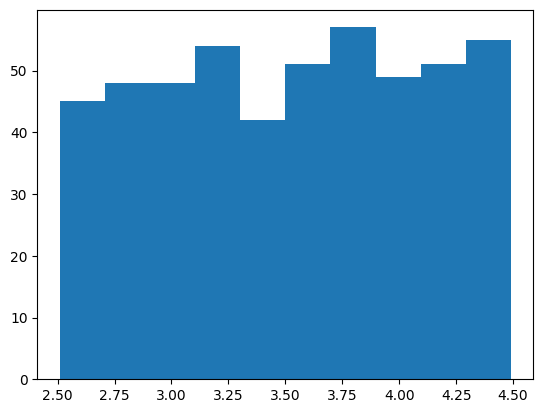

In [73]:
plt.hist(spotify_df["Avg Stream Duration (Min)"])

plt.show()

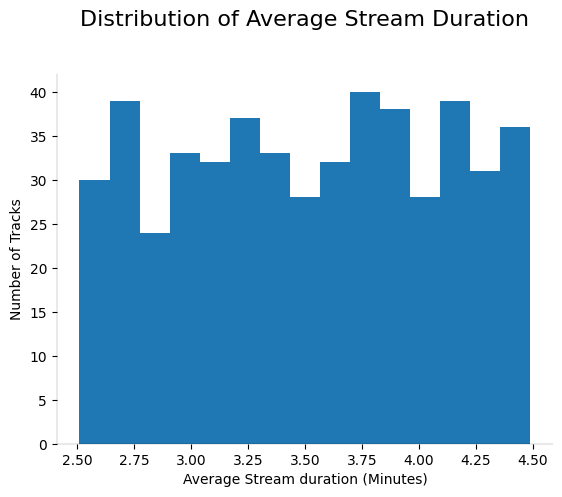

In [81]:

plt.Figure(figsize=(10,6))
plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
    bins = 15)

plt.xlabel("Average Stream duration (Minutes)")
plt.ylabel("Number of Tracks")
# plt.title("Distribution of Average Stream Duration",
#           fontsize = 15,
#           pad =20)

ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(
    "Distribution of Average Stream Duration",
    fontsize =16,
    pad = 35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)


plt.show()

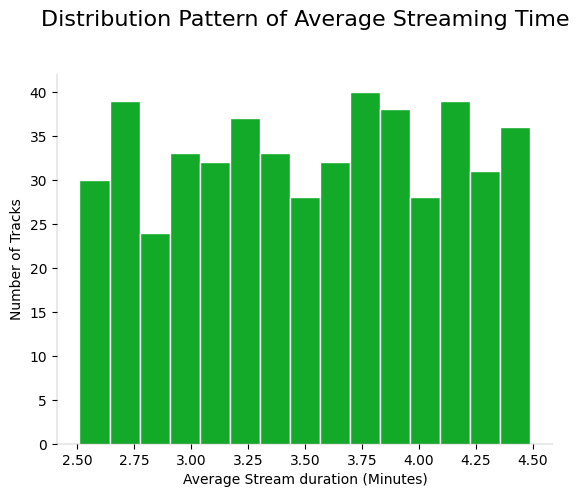

In [137]:

plt.Figure(figsize=(10,6))
plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
    bins = 15,
    color="#12aa28",
    edgecolor = "white")

plt.xlabel("Average Stream duration (Minutes)")
plt.ylabel("Number of Tracks")
# plt.title("Distribution of Average Stream Duration",
#           fontsize = 15,
#           pad =20)

ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(
    "Distribution Pattern of Average Streaming Time",
    fontsize =16,
    pad = 35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)

plt.savefig("../plots/AverageStreamHistogram.png")
plt.show()

* Boxplots
Boxplots are a compact way to compare the spread of a numeric variable across different categories.

In the video, we’ll walk through how to:

Choose a numeric column (like skip rate or stream duration) and a categorical column (like platform type or genre)
Use plt.boxplot() to compare distributions
Interpret medians, quartiles, and outliers
Rotate tick labels and customize colors
Boxplots are great for spotting variability, skew, and outliers. They’re especially useful when you want to compare how a metric differs across groups, like seeing whether Premium streams tend to have lower skip rates than Free streams.

In [89]:
spotify_df.columns

Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')

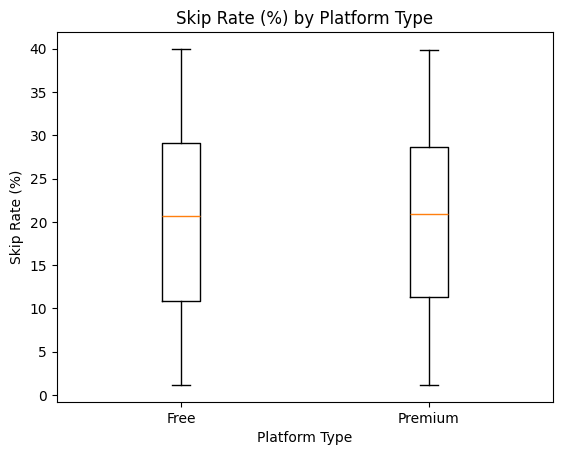

In [96]:
plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
     spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1,2],["Free","Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type")

plt.show()

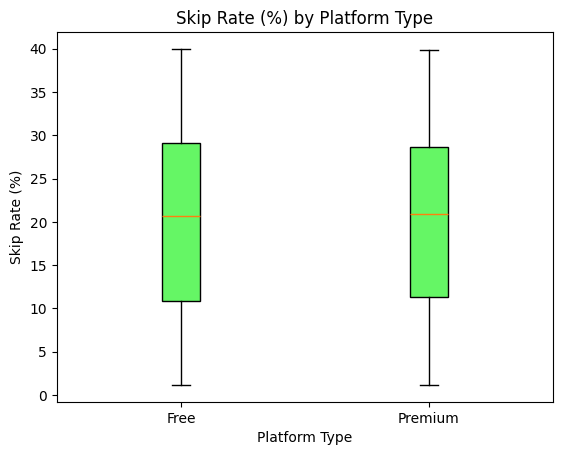

In [139]:
plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],
     spotify_df[spotify_df["Platform Type"]=="Premium"]["Skip Rate (%)"]],
    patch_artist=True, 
    boxprops=dict(facecolor="#65f665")
)

plt.xticks([1,2],["Free","Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type")


plt.savefig("../plots/SkipRate%byPlatformType.png")
plt.show()

* Heatmaps
Heatmaps use color to represent values in a matrix- often for comparing relationships or intensities across two dimensions.

In the video, we’ll walk through how to:

Create a correlation matrix using .corr() on numeric columns
Use plt.imshow() or plt.matshow() to visualize it
Add a colorbar, axis ticks, and labels
Format the layout for readability
Heatmaps are commonly used to explore correlations between variables. For example, you can quickly spot whether energy, valence, or tempo tend to rise and fall together—or whether skip rate is negatively correlated with popularity.
(correlation is a number between -1 and 1, it tells us a strength and the direction os linear relation)

In [102]:
spotify_df.columns

Index(['Country', 'Artist', 'Album', 'Genre', 'Release Year',
       'Monthly Listeners (Millions)', 'Total Streams (Millions)',
       'Total Hours Streamed (Millions)', 'Avg Stream Duration (Min)',
       'Platform Type', 'Streams Last 30 Days (Millions)', 'Skip Rate (%)'],
      dtype='object')

In [103]:
numeric_spotify_df = spotify_df.select_dtypes(include =[np.number])
numeric_spotify_df.head()

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
0,2020,23.10,3695.53,14240.35,4.28,118.51,2.24
1,2023,60.60,2828.16,11120.44,3.90,44.87,23.98
2,2019,42.84,1425.46,4177.49,4.03,19.46,4.77
3,2019,73.24,2704.33,12024.08,3.26,166.05,25.12
4,2019,7.89,3323.25,13446.32,4.47,173.43,15.82


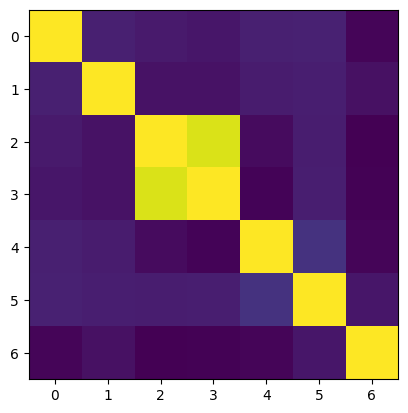

In [104]:
corr = numeric_spotify_df.corr()  #creates corelation matrix

plt.imshow(corr)
plt.show()

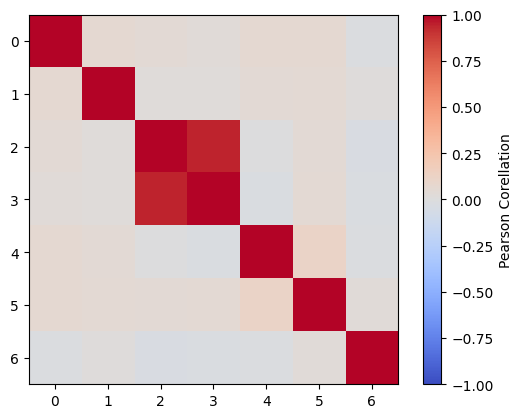

In [107]:
corr = numeric_spotify_df.corr()  #creates corelation matrix

im = plt.imshow(corr, vmin = -1, vmax =1, cmap="coolwarm")
plt.colorbar(im, label = "Pearson Corellation")

#plt.imshow(corr)
plt.show()

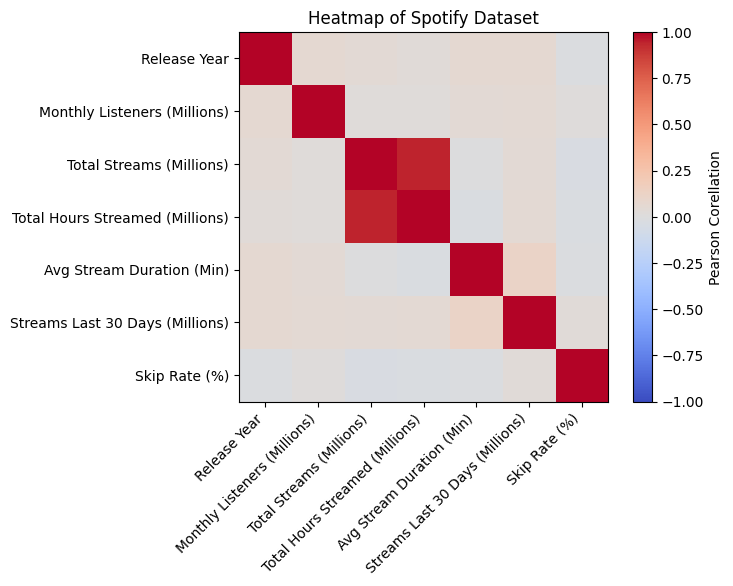

In [140]:
corr = numeric_spotify_df.corr()  #creates corelation matrix

im = plt.imshow(corr, vmin = -1, vmax =1, cmap="coolwarm")
plt.colorbar(im, label = "Pearson Corellation")

plt.xticks(range(len(corr.columns)), corr.columns,rotation =45,ha = "right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap of Spotify Dataset")

#plt.imshow(corr)
plt.savefig("../plots/HeatmapOfSpotifyDataset.png")
plt.show()

* Count Plots
Count plots show how many records fall into each category.

In the video, we’ll walk through how to:

Use .value_counts() to count rows per category (e.g. platform type or genre)
Use plt.bar() to visualize those counts
Add labels and adjust layout
Sort values for better visual clarity
Count plots are perfect for exploring how common different categories are. They're a quick way to answer questions like: Which genres appear most often in the dataset? Are more songs streamed on Premium vs Free platforms?

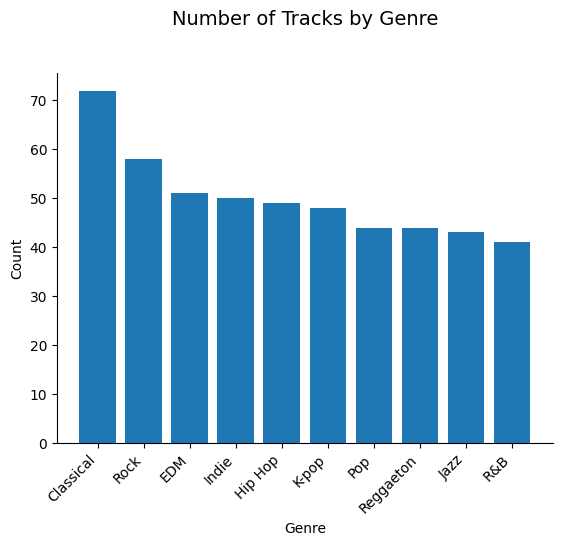

In [122]:
genre_counts = spotify_df["Genre"].value_counts().sort_values(ascending=False)
genre_counts

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation = 45, ha ="right")

plt.xlabel("Genre")
plt.ylabel("Count")
ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(
    "Number of Tracks by Genre",
    fontsize =14,
    pad = 35)

plt.show()

In [127]:
max_index = genre_counts.idxmax() #index of max value
print(f"max_index: {max_index}")
highlight_position = genre_counts.index.get_loc(max_index)
print(f"highlight_position: {highlight_position}")
colors[highlight_position] = "#68f476"

max_index: Classical
highlight_position: 0


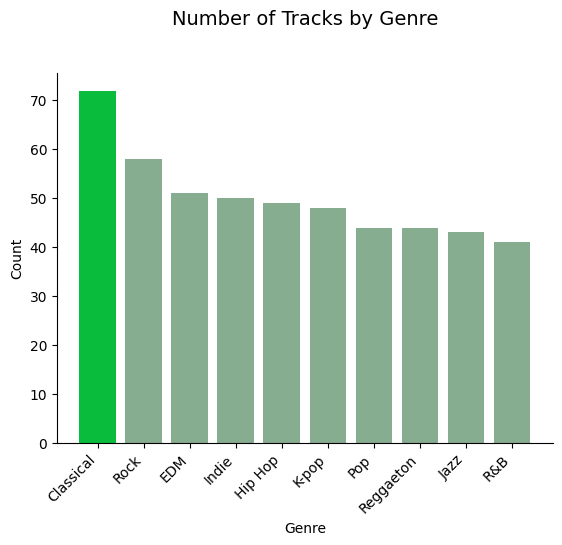

In [141]:

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation = 45, ha ="right")
colors=["#87AD91"]*len(genre_counts) # list of colors, list of color for how many bars we have

max_index = genre_counts.idxmax() #index of max value
highlight_position = genre_counts.index.get_loc(max_index)
colors[highlight_position] = "#09bc3c"

plt.bar(genre_counts.index,genre_counts.values,color = colors, width = 0.8)

plt.xlabel("Genre")
plt.ylabel("Count")
ax=plt.gca() #get current axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title(
    "Number of Tracks by Genre",
    fontsize =14,
    pad = 35)

plt.savefig("../plots/NumberOfTracksByGenre.png")
plt.show()

In [ ]:
#To save Visualizations use plt.savefig("<path_to_store>") before plt.show()
plt.savefig("../plot/AverageStreamHistogram.png")

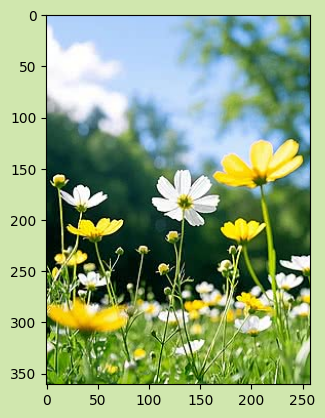

In [154]:
#Displaying image
img = plt.imread("image_flowers.jpg")
# print(type(img))
# print(img.shape)
# print(img[100, 100, 0])
# ax = plt.gca()  
#plt.axis('off')
plt.figure(facecolor="#D0E7AE")
plt.savefig("../plots/ImageDisplay.png")
plt.imshow(img)